# Revisão de Estatística Descritiva - Aplicação no Mercado Financeiro

## Importando as Bibliotecas

In [76]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy import optimize

### Baixando os dados de uma ação para da B3

In [2]:
bb_df = data.DataReader(name='BBAS3.SA',
                           data_source='yahoo', start='2000-01-01')
bb_df

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2000-01-03   2.853333   2.733333   2.800000   2.733333    514800.0   1.182133
2000-01-04   2.740000   2.603333   2.733333   2.603333    314100.0   1.125910
2000-01-05   2.633333   2.506666   2.600000   2.630000    478800.0   1.137444
2000-01-06   2.666666   2.600000   2.630000   2.666666    205200.0   1.153301
2000-01-07   2.666666   2.606666   2.666666   2.606666    394200.0   1.127352
...               ...        ...        ...        ...         ...        ...
2022-07-01  33.340000  32.799999  33.049999  33.150002   8377000.0  33.150002
2022-07-04  33.230000  32.799999  33.110001  33.040001   5169600.0  33.040001
2022-07-05  33.020000  32.340000  32.869999  32.860001   8687900.0  32.860001
2022-07-06  33.080002  32.200001  32.680000  32.650002  10841800.0  32.650002
2022-07-07  33.389999  32.950001  32.950001  33.130001   9687800.0  33.130001

[5566 rows x 6 columns]

### Construindo uma Base de Dados Financeiros com Mais Ações

In [3]:
acoes = ['BBAS3.SA', 'BRFS3.SA', 'CIEL3.SA', 'PETR3.SA', 'MGLU3.SA', '^BVSP']
acoes

['BBAS3.SA', 'BRFS3.SA', 'CIEL3.SA', 'PETR3.SA', 'MGLU3.SA', '^BVSP']

In [4]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao,
                                     data_source='yahoo', start='2015-01-01')['Close']

In [5]:
acoes_df

BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA         ^BVSP
Date                                                                          
2015-01-02  22.650000  62.180000  22.986111   9.000000  0.232812   48512.00000
2015-01-05  22.180000  61.000000  22.204861   8.270000  0.237187   47517.00000
2015-01-06  22.490000  61.549999  21.759258   8.060000  0.234062   48001.00000
2015-01-07  23.480000  64.300003  21.961805   8.450000  0.241875   49463.00000
2015-01-08  23.559999  63.150002  22.569445   9.020000  0.240000   49943.00000
...               ...        ...        ...        ...       ...           ...
2022-07-01  33.150002  14.280000   3.930000  31.110001  2.200000   98954.00000
2022-07-04  33.040001  14.730000   3.870000  31.850000  2.130000   98609.00000
2022-07-05  32.860001  15.860000   3.850000  30.490000  2.380000   98295.00000
2022-07-06  32.650002  15.660000   3.810000  30.030001  2.500000   98719.00000
2022-07-07  33.130001  15.680000   3.900000  30.920000  2.560000  100729.71875

[1867 rows x 6 columns]

In [6]:
acoes_df.reset_index(inplace=True)
acoes_df

Date   BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA  \
0    2015-01-02  22.650000  62.180000  22.986111   9.000000  0.232812   
1    2015-01-05  22.180000  61.000000  22.204861   8.270000  0.237187   
2    2015-01-06  22.490000  61.549999  21.759258   8.060000  0.234062   
3    2015-01-07  23.480000  64.300003  21.961805   8.450000  0.241875   
4    2015-01-08  23.559999  63.150002  22.569445   9.020000  0.240000   
...         ...        ...        ...        ...        ...       ...   
1862 2022-07-01  33.150002  14.280000   3.930000  31.110001  2.200000   
1863 2022-07-04  33.040001  14.730000   3.870000  31.850000  2.130000   
1864 2022-07-05  32.860001  15.860000   3.850000  30.490000  2.380000   
1865 2022-07-06  32.650002  15.660000   3.810000  30.030001  2.500000   
1866 2022-07-07  33.130001  15.680000   3.900000  30.920000  2.560000   

             ^BVSP  
0      48512.00000  
1      47517.00000  
2      48001.00000  
3      49463.00000  
4      49943.00000  
...            ...  
1862   98954.00000  
1863   98609.00000  
1864   98295.00000  
1865   98719.00000  
1866  100729.71875  

[1867 rows x 7 columns]

### Visualização dos Dados

In [8]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df["Date"] ,y = acoes_df[i], name = i)
figura.show()

Taxa de Retorno de Ações

$$ \mathbb{E} [ R_i] = log \left( \frac{P_t}{P_{t-1}} \right) $$

In [9]:
dataset = acoes_df.copy()
dataset

Date   BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA  \
0    2015-01-02  22.650000  62.180000  22.986111   9.000000  0.232812   
1    2015-01-05  22.180000  61.000000  22.204861   8.270000  0.237187   
2    2015-01-06  22.490000  61.549999  21.759258   8.060000  0.234062   
3    2015-01-07  23.480000  64.300003  21.961805   8.450000  0.241875   
4    2015-01-08  23.559999  63.150002  22.569445   9.020000  0.240000   
...         ...        ...        ...        ...        ...       ...   
1862 2022-07-01  33.150002  14.280000   3.930000  31.110001  2.200000   
1863 2022-07-04  33.040001  14.730000   3.870000  31.850000  2.130000   
1864 2022-07-05  32.860001  15.860000   3.850000  30.490000  2.380000   
1865 2022-07-06  32.650002  15.660000   3.810000  30.030001  2.500000   
1866 2022-07-07  33.130001  15.680000   3.900000  30.920000  2.560000   

             ^BVSP  
0      48512.00000  
1      47517.00000  
2      48001.00000  
3      49463.00000  
4      49943.00000  
...            ...  
1862   98954.00000  
1863   98609.00000  
1864   98295.00000  
1865   98719.00000  
1866  100729.71875  

[1867 rows x 7 columns]

In [10]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA         ^BVSP
0     22.650000  62.180000  22.986111   9.000000  0.232812   48512.00000
1     22.180000  61.000000  22.204861   8.270000  0.237187   47517.00000
2     22.490000  61.549999  21.759258   8.060000  0.234062   48001.00000
3     23.480000  64.300003  21.961805   8.450000  0.241875   49463.00000
4     23.559999  63.150002  22.569445   9.020000  0.240000   49943.00000
...         ...        ...        ...        ...       ...           ...
1862  33.150002  14.280000   3.930000  31.110001  2.200000   98954.00000
1863  33.040001  14.730000   3.870000  31.850000  2.130000   98609.00000
1864  32.860001  15.860000   3.850000  30.490000  2.380000   98295.00000
1865  32.650002  15.660000   3.810000  30.030001  2.500000   98719.00000
1866  33.130001  15.680000   3.900000  30.920000  2.560000  100729.71875

[1867 rows x 6 columns]

In [12]:
dataset.shift(1)

BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA    ^BVSP
0           NaN        NaN        NaN        NaN       NaN      NaN
1     22.650000  62.180000  22.986111   9.000000  0.232812  48512.0
2     22.180000  61.000000  22.204861   8.270000  0.237187  47517.0
3     22.490000  61.549999  21.759258   8.060000  0.234062  48001.0
4     23.480000  64.300003  21.961805   8.450000  0.241875  49463.0
...         ...        ...        ...        ...       ...      ...
1862  33.380001  13.590000   3.750000  30.540001  2.340000  98542.0
1863  33.150002  14.280000   3.930000  31.110001  2.200000  98954.0
1864  33.040001  14.730000   3.870000  31.850000  2.130000  98609.0
1865  32.860001  15.860000   3.850000  30.490000  2.380000  98295.0
1866  32.650002  15.660000   3.810000  30.030001  2.500000  98719.0

[1867 rows x 6 columns]

In [11]:
taxas_retorno = np.log(dataset / dataset.shift(1))
taxas_retorno

BBAS3.SA  BRFS3.SA  CIEL3.SA  PETR3.SA  MGLU3.SA     ^BVSP
0          NaN       NaN       NaN       NaN       NaN       NaN
1    -0.020969 -0.019160 -0.034579 -0.084590  0.018618 -0.020724
2     0.013880  0.008976 -0.020272 -0.025721 -0.013263  0.010134
3     0.043078  0.043710  0.009265  0.047253  0.032835  0.030003
4     0.003401 -0.018047  0.027292  0.065278 -0.007782  0.009657
...        ...       ...       ...       ...       ...       ...
1862 -0.006914  0.049526  0.046884  0.018492 -0.061694  0.004172
1863 -0.003324  0.031026 -0.015385  0.023508 -0.032335 -0.003493
1864 -0.005463  0.073914 -0.005181 -0.043639  0.110979 -0.003189
1865 -0.006411 -0.012691 -0.010444 -0.015202  0.049190  0.004304
1866  0.014594  0.001276  0.023347  0.029206  0.023717  0.020163

[1867 rows x 6 columns]

In [13]:
taxas_retorno.describe()

BBAS3.SA     BRFS3.SA     CIEL3.SA     PETR3.SA     MGLU3.SA  \
count  1866.000000  1866.000000  1866.000000  1866.000000  1866.000000   
mean      0.000204    -0.000738    -0.000951     0.000661     0.001285   
std       0.028070     0.026269     0.028803     0.032774     0.040831   
min      -0.237891    -0.219987    -0.237959    -0.352054    -0.236698   
25%      -0.013787    -0.013161    -0.016106    -0.014222    -0.018765   
50%       0.000000    -0.001046    -0.002148     0.000852     0.000000   
75%       0.014310     0.011693     0.012804     0.016666     0.019911   
max       0.158081     0.150814     0.210721     0.205024     0.316924   

             ^BVSP  
count  1850.000000  
mean      0.000360  
std       0.016444  
min      -0.159930  
25%      -0.007861  
50%       0.000598  
75%       0.009364  
max       0.130223

In [21]:
medias = (taxas_retorno[acoes].sum()/len(taxas_retorno[acoes]))*100
medias

BBAS3.SA    0.020368
BRFS3.SA   -0.073789
CIEL3.SA   -0.095014
PETR3.SA    0.066105
MGLU3.SA    0.128416
^BVSP       0.035714
dtype: float64

In [14]:
taxas_retorno.mean()*100

BBAS3.SA    0.020379
BRFS3.SA   -0.073829
CIEL3.SA   -0.095065
PETR3.SA    0.066140
MGLU3.SA    0.128485
^BVSP       0.036042
dtype: float64

In [31]:
vars_acoes = ((taxas_retorno[acoes] - taxas_retorno.mean()) ** 2).sum() / (len(taxas_retorno[acoes]) - 1)
vars_acoes

BBAS3.SA    0.000788
BRFS3.SA    0.000690
CIEL3.SA    0.000829
PETR3.SA    0.001074
MGLU3.SA    0.001666
^BVSP       0.000268
dtype: float64

In [29]:
taxas_retorno.var()

BBAS3.SA    0.000788
BRFS3.SA    0.000690
CIEL3.SA    0.000830
PETR3.SA    0.001074
MGLU3.SA    0.001667
^BVSP       0.000270
dtype: float64

In [15]:
taxas_retorno.std()*100

BBAS3.SA    2.807041
BRFS3.SA    2.626871
CIEL3.SA    2.880268
PETR3.SA    3.277379
MGLU3.SA    4.083092
^BVSP       1.644386
dtype: float64

In [17]:
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
date

Date
0    2015-01-02
1    2015-01-05
2    2015-01-06
3    2015-01-07
4    2015-01-08
...         ...
1862 2022-07-01
1863 2022-07-04
1864 2022-07-05
1865 2022-07-06
1866 2022-07-07

[1867 rows x 1 columns]

In [18]:
taxas_retorno_date = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno_date

Date  BBAS3.SA  BRFS3.SA  CIEL3.SA  PETR3.SA  MGLU3.SA     ^BVSP
0    2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN
1    2015-01-05 -0.020969 -0.019160 -0.034579 -0.084590  0.018618 -0.020724
2    2015-01-06  0.013880  0.008976 -0.020272 -0.025721 -0.013263  0.010134
3    2015-01-07  0.043078  0.043710  0.009265  0.047253  0.032835  0.030003
4    2015-01-08  0.003401 -0.018047  0.027292  0.065278 -0.007782  0.009657
...         ...       ...       ...       ...       ...       ...       ...
1862 2022-07-01 -0.006914  0.049526  0.046884  0.018492 -0.061694  0.004172
1863 2022-07-04 -0.003324  0.031026 -0.015385  0.023508 -0.032335 -0.003493
1864 2022-07-05 -0.005463  0.073914 -0.005181 -0.043639  0.110979 -0.003189
1865 2022-07-06 -0.006411 -0.012691 -0.010444 -0.015202  0.049190  0.004304
1866 2022-07-07  0.014594  0.001276  0.023347  0.029206  0.023717  0.020163

[1867 rows x 7 columns]

In [19]:
figura = px.line(title = 'Histórico de retorno das ações')
for i in taxas_retorno_date.columns[1:]:
  figura.add_scatter(x = taxas_retorno_date["Date"] ,y = taxas_retorno_date[i], name = i)
figura.show()

In [35]:
taxas_retorno.cov()

BBAS3.SA  BRFS3.SA  CIEL3.SA  PETR3.SA  MGLU3.SA     ^BVSP
BBAS3.SA  0.000788  0.000245  0.000326  0.000564  0.000424  0.000371
BRFS3.SA  0.000245  0.000690  0.000182  0.000282  0.000283  0.000213
CIEL3.SA  0.000326  0.000182  0.000830  0.000303  0.000297  0.000243
PETR3.SA  0.000564  0.000282  0.000303  0.001074  0.000390  0.000414
MGLU3.SA  0.000424  0.000283  0.000297  0.000390  0.001667  0.000326
^BVSP     0.000371  0.000213  0.000243  0.000414  0.000326  0.000270

In [36]:
taxas_retorno.corr()

BBAS3.SA  BRFS3.SA  CIEL3.SA  PETR3.SA  MGLU3.SA     ^BVSP
BBAS3.SA  1.000000  0.331957  0.403017  0.612764  0.369513  0.801231
BRFS3.SA  0.331957  1.000000  0.240711  0.327032  0.263868  0.490517
CIEL3.SA  0.403017  0.240711  1.000000  0.321022  0.252534  0.511723
PETR3.SA  0.612764  0.327032  0.321022  1.000000  0.291495  0.766244
MGLU3.SA  0.369513  0.263868  0.252534  0.291495  1.000000  0.485372
^BVSP     0.801231  0.490517  0.511723  0.766244  0.485372  1.000000

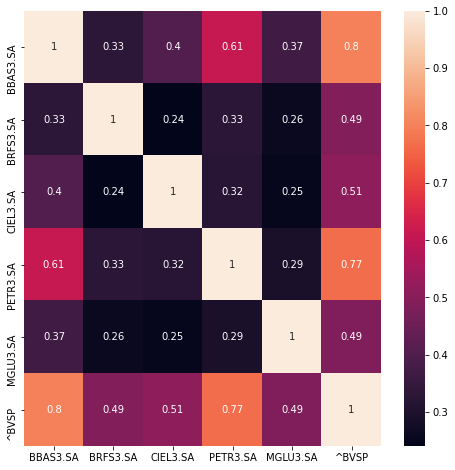

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

#### Montando uma Carteira de Ativos

In [39]:
taxas_retorno_date["CARTEIRA"] = (taxas_retorno_date["BBAS3.SA"] + taxas_retorno_date["BRFS3.SA"] + 
                                   taxas_retorno_date["CIEL3.SA"] + taxas_retorno_date["PETR3.SA"] + 
                                   taxas_retorno_date["MGLU3.SA"])/5
taxas_retorno_date

Date  BBAS3.SA  BRFS3.SA  CIEL3.SA  PETR3.SA  MGLU3.SA     ^BVSP  \
0    2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1    2015-01-05 -0.020969 -0.019160 -0.034579 -0.084590  0.018618 -0.020724   
2    2015-01-06  0.013880  0.008976 -0.020272 -0.025721 -0.013263  0.010134   
3    2015-01-07  0.043078  0.043710  0.009265  0.047253  0.032835  0.030003   
4    2015-01-08  0.003401 -0.018047  0.027292  0.065278 -0.007782  0.009657   
...         ...       ...       ...       ...       ...       ...       ...   
1862 2022-07-01 -0.006914  0.049526  0.046884  0.018492 -0.061694  0.004172   
1863 2022-07-04 -0.003324  0.031026 -0.015385  0.023508 -0.032335 -0.003493   
1864 2022-07-05 -0.005463  0.073914 -0.005181 -0.043639  0.110979 -0.003189   
1865 2022-07-06 -0.006411 -0.012691 -0.010444 -0.015202  0.049190  0.004304   
1866 2022-07-07  0.014594  0.001276  0.023347  0.029206  0.023717  0.020163   

      CARTEIRA  
0          NaN  
1    -0.028136  
2    -0.007280  
3     0.035228  
4     0.014029  
...        ...  
1862  0.009259  
1863  0.000698  
1864  0.026122  
1865  0.000889  
1866  0.018428  

[1867 rows x 8 columns]

In [40]:
taxas_retorno_port = taxas_retorno_date.filter(["Date", "CARTEIRA", "^BVSP"])
taxas_retorno_port

Date  CARTEIRA     ^BVSP
0    2015-01-02       NaN       NaN
1    2015-01-05 -0.028136 -0.020724
2    2015-01-06 -0.007280  0.010134
3    2015-01-07  0.035228  0.030003
4    2015-01-08  0.014029  0.009657
...         ...       ...       ...
1862 2022-07-01  0.009259  0.004172
1863 2022-07-04  0.000698 -0.003493
1864 2022-07-05  0.026122 -0.003189
1865 2022-07-06  0.000889  0.004304
1866 2022-07-07  0.018428  0.020163

[1867 rows x 3 columns]

In [43]:
figura = px.line(title = 'Comparação de retorno Carteira x Ibovespa')
for i in taxas_retorno_port.columns[1:]:
  figura.add_scatter(x = taxas_retorno_port["Date"] ,y = taxas_retorno_port[i], name = i)
figura.add_hline(y = taxas_retorno_port['CARTEIRA'].mean(), line_color="green", line_dash="dot", )
figura.show()

In [44]:
taxas_retorno_port_corr = taxas_retorno_date.filter(["CARTEIRA", "^BVSP"])
taxas_retorno_port_corr

CARTEIRA     ^BVSP
0          NaN       NaN
1    -0.028136 -0.020724
2    -0.007280  0.010134
3     0.035228  0.030003
4     0.014029  0.009657
...        ...       ...
1862  0.009259  0.004172
1863  0.000698 -0.003493
1864  0.026122 -0.003189
1865  0.000889  0.004304
1866  0.018428  0.020163

[1867 rows x 2 columns]

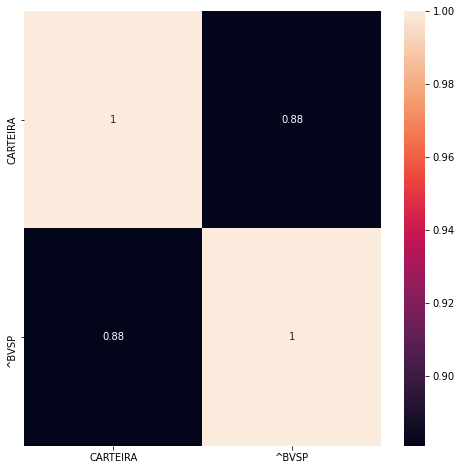

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno_port_corr.corr(), annot=True);

#### Alocação Aleatória de Ativos - Portfólio Markowitz

In [49]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
acoes_port

Date   BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA
0    2015-01-02  22.650000  62.180000  22.986111   9.000000  0.232812
1    2015-01-05  22.180000  61.000000  22.204861   8.270000  0.237187
2    2015-01-06  22.490000  61.549999  21.759258   8.060000  0.234062
3    2015-01-07  23.480000  64.300003  21.961805   8.450000  0.241875
4    2015-01-08  23.559999  63.150002  22.569445   9.020000  0.240000
...         ...        ...        ...        ...        ...       ...
1862 2022-07-01  33.150002  14.280000   3.930000  31.110001  2.200000
1863 2022-07-04  33.040001  14.730000   3.870000  31.850000  2.130000
1864 2022-07-05  32.860001  15.860000   3.850000  30.490000  2.380000
1865 2022-07-06  32.650002  15.660000   3.810000  30.030001  2.500000
1866 2022-07-07  33.130001  15.680000   3.900000  30.920000  2.560000

[1867 rows x 6 columns]

In [50]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [51]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, 10000, 10)

In [52]:
dataset

BBAS3.SA   BRFS3.SA     CIEL3.SA     PETR3.SA      MGLU3.SA  \
0     2885.564869  77.634505  2370.522690  2801.328081   1864.949855   
1     2825.687892  76.161222  2289.953564  2574.109390   1899.995934   
2     2865.181207  76.847920  2243.999263  2508.745056   1874.963020   
3     2991.305208  80.281423  2264.887635  2630.135750   1937.549303   
4     3001.497039  78.845594  2327.552555  2807.553397   1922.529555   
...           ...        ...          ...          ...           ...   
1862  4223.244213  17.829217   405.294939  9683.257590  17623.188364   
1863  4209.230354  18.391062   399.107211  9913.588939  17062.451099   
1864  4186.298674  19.801917   397.044644  9490.276950  19065.086097   
1865  4159.545208  19.552208   392.919509  9347.098244  20026.349979   
1866  4220.696195  19.577180   402.201088  9624.118275  20506.981920   

        soma valor  taxa retorno  
0     10000.000000      0.000000  
1      9665.908002     -3.398004  
2      9569.736468     -0.999939  
3      9904.159319      3.434913  
4     10137.978140      2.333378  
...            ...           ...  
1862  31952.814323     -2.941749  
1863  31602.768665     -1.101553  
1864  33158.508282      4.805461  
1865  33945.465149      2.345593  
1866  34773.574658      2.410248  

[1867 rows x 7 columns]

In [53]:
acoes_pesos

Ações     Pesos
0  BBAS3.SA  0.288556
1  BRFS3.SA  0.007763
2  CIEL3.SA  0.237052
3  PETR3.SA  0.280133
4  MGLU3.SA  0.186495

In [54]:
datas

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
1862   2022-07-01
1863   2022-07-04
1864   2022-07-05
1865   2022-07-06
1866   2022-07-07
Name: Date, Length: 1867, dtype: datetime64[ns]

In [55]:
soma_valor

34773.57465807308

In [56]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

In [57]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [58]:
figura = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
figura.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
figura.show()

#### Mais estatísticas sobre o portfólio aleatório

In [59]:
# Retorno
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

2.477357465807308

In [60]:
# Desvio-Padrão
dataset['taxa retorno'].std()

2.9367087913907732

In [61]:
# Sharpe Ratio
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std())

0.022730441188966118

In [62]:
dinheiro_total = 10000
soma_valor - dinheiro_total

24773.574658073077

## Simulação da Fronteira Eficiente

In [64]:
acoes_port

Date   BBAS3.SA   BRFS3.SA   CIEL3.SA   PETR3.SA  MGLU3.SA
0    2015-01-02  22.650000  62.180000  22.986111   9.000000  0.232812
1    2015-01-05  22.180000  61.000000  22.204861   8.270000  0.237187
2    2015-01-06  22.490000  61.549999  21.759258   8.060000  0.234062
3    2015-01-07  23.480000  64.300003  21.961805   8.450000  0.241875
4    2015-01-08  23.559999  63.150002  22.569445   9.020000  0.240000
...         ...        ...        ...        ...        ...       ...
1862 2022-07-01  33.150002  14.280000   3.930000  31.110001  2.200000
1863 2022-07-04  33.040001  14.730000   3.870000  31.850000  2.130000
1864 2022-07-05  32.860001  15.860000   3.850000  30.490000  2.380000
1865 2022-07-06  32.650002  15.660000   3.810000  30.030001  2.500000
1866 2022-07-07  33.130001  15.680000   3.900000  30.920000  2.560000

[1867 rows x 6 columns]

In [65]:
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))
log_ret

BBAS3.SA  BRFS3.SA  CIEL3.SA  PETR3.SA  MGLU3.SA
0          NaN       NaN       NaN       NaN       NaN
1    -0.020969 -0.019160 -0.034579 -0.084590  0.018618
2     0.013880  0.008976 -0.020272 -0.025721 -0.013263
3     0.043078  0.043710  0.009265  0.047253  0.032835
4     0.003401 -0.018047  0.027292  0.065278 -0.007782
...        ...       ...       ...       ...       ...
1862 -0.006914  0.049526  0.046884  0.018492 -0.061694
1863 -0.003324  0.031026 -0.015385  0.023508 -0.032335
1864 -0.005463  0.073914 -0.005181 -0.043639  0.110979
1865 -0.006411 -0.012691 -0.010444 -0.015202  0.049190
1866  0.014594  0.001276  0.023347  0.029206  0.023717

[1867 rows x 5 columns]

In [66]:
np.random.seed(42)
num_ports = 1000
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [67]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
print("Local do Max Sharpe Ratio: {}". format(sharpe_arr.argmax()))

Max Sharpe Ratio: 0.028036639140852717
Local do Max Sharpe Ratio: 643


In [68]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[643,:])

[0.06771511 0.09521168 0.00114756 0.41402801 0.42189764]


In [69]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print(max_sr_ret)
print(max_sr_vol)

0.0007583302005702635
0.027047828263598337


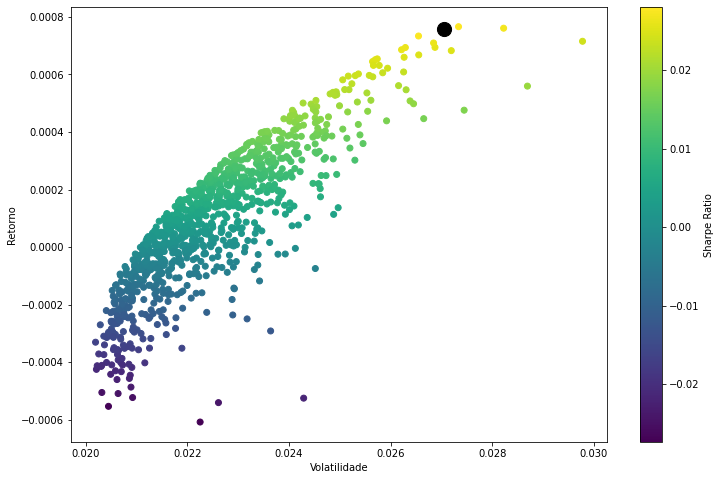

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200) # black dot
plt.show()

Nós podemos ver no gráfico assima o conjunto de portfólios simulados, pois o peso $w_i$ de cada ativo foi simulado e criamos um conjunto de $n = 1000$ carteiras e escolhemos no ponto vermelho a que tem maior **Sharpe Ratio**, que é a razão retorno sobre a volatilidade. Esse dado nos da uma noção do portfólio ponderado pelo risco.

In [73]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [74]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

In [77]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

     fun: -0.03350524739490415
     jac: array([ 9.11070872e-03,  3.23882690e-02,  3.95798609e-02, -1.67272519e-04,
        8.77752900e-05])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.        , 0.        , 0.        , 0.34415069, 0.65584931])


In [85]:
frontier_y = np.linspace(-0.0006, 0.0008, 200)

In [86]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [87]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

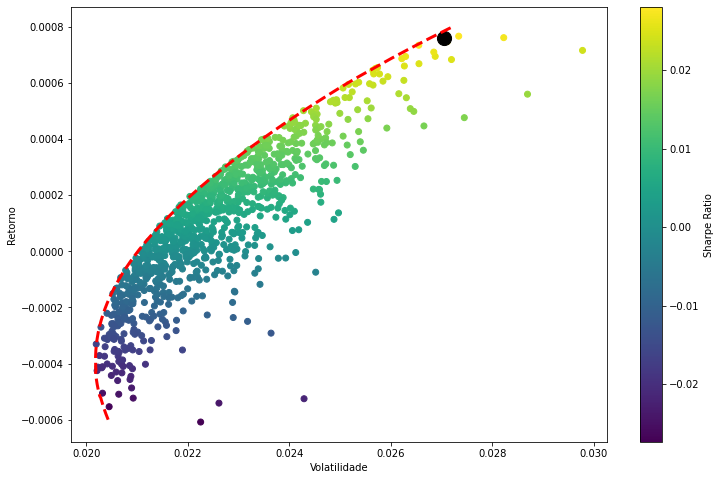

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200)
# plt.savefig('cover.png')
plt.show()